# Exploratory Data Analysis (EDA) on Retail Sales Data

## 📦 Importing Required Libraries
We start by importing the essential Python libraries for our retail sales analysis:

- **NumPy (`numpy`)** → For numerical operations and handling arrays.
- **Pandas (`pandas`)** → For data loading, cleaning, and manipulation.
- **Seaborn (`seaborn`)** → For creating attractive statistical visualizations.
- **Matplotlib (`matplotlib`)** → For generating detailed and customizable plots.


In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## 📂 Loading the Dataset
We load the retail sales dataset from the specified file path into a Pandas DataFrame (`df`).  
The `.head()` function displays the first five rows of the dataset, allowing us to quickly verify that the data has been loaded correctly and to get an initial look at its structure.


In [22]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 📝 Dataset Information
We use the `.info()` method to display a concise summary of the dataset, including:
- The number of rows and columns
- Column names and their data types
- Non-null (non-missing) value counts for each column

This helps us understand the structure of the data and identify potential missing values.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## 🔍 Checking for Missing Values
We use `.isnull().sum()` to calculate the total number of missing (null) values in each column of the dataset.  
This step helps us identify if data cleaning or imputation is needed before analysis.


In [24]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

## 📊 Descriptive Statistics
We use the `.describe()` method to generate summary statistics for all numerical columns in the dataset, including:
- Count (number of non-null values)
- Mean (average value)
- Standard deviation
- Minimum and maximum values
- 25th, 50th (median), and 75th percentiles

This provides a quick overview of the data distribution and helps detect potential outliers or anomalies.


In [25]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## 📈 Daily Sales Trend
In this step, we analyze how sales vary on a daily basis.

**Steps performed:**
1. **Convert 'Date' column to datetime format**  
   Ensures the column is recognized as a proper date type for time series operations.
2. **Set 'Date' as the index and aggregate total sales by day**  
   We resample the data on a daily (`'D'`) basis and calculate the sum of sales for each day.
3. **Plot the daily sales trend**  
   A line plot is created to visualize fluctuations and identify patterns, peaks, or dips in sales over time.


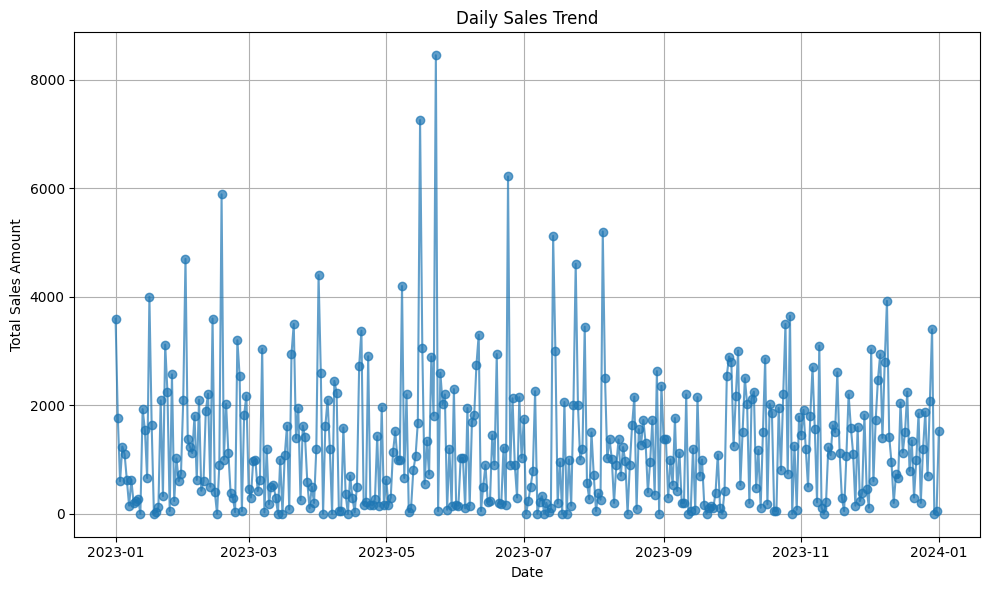

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

df_daily_sales = df.set_index('Date').resample('D')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(df_daily_sales, marker='o', linestyle='-', alpha=0.7)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📆 Monthly Sales Trend
Here, we examine how total sales vary on a monthly basis.

**Steps performed:**
1. **Resample data by month (`'M'`)**  
   Using the `'Date'` column as the index, we group sales data by month and calculate the sum of sales for each month.
2. **Plot the monthly sales trend**  
   We use a line plot with markers to visualize month-to-month changes in sales, making it easier to identify seasonal patterns or long-term growth/decline trends.


C:\Users\Admin\AppData\Local\Temp\ipykernel_5712\1068530984.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_sales = df.set_index('Date').resample('M')['Total Amount'].sum()


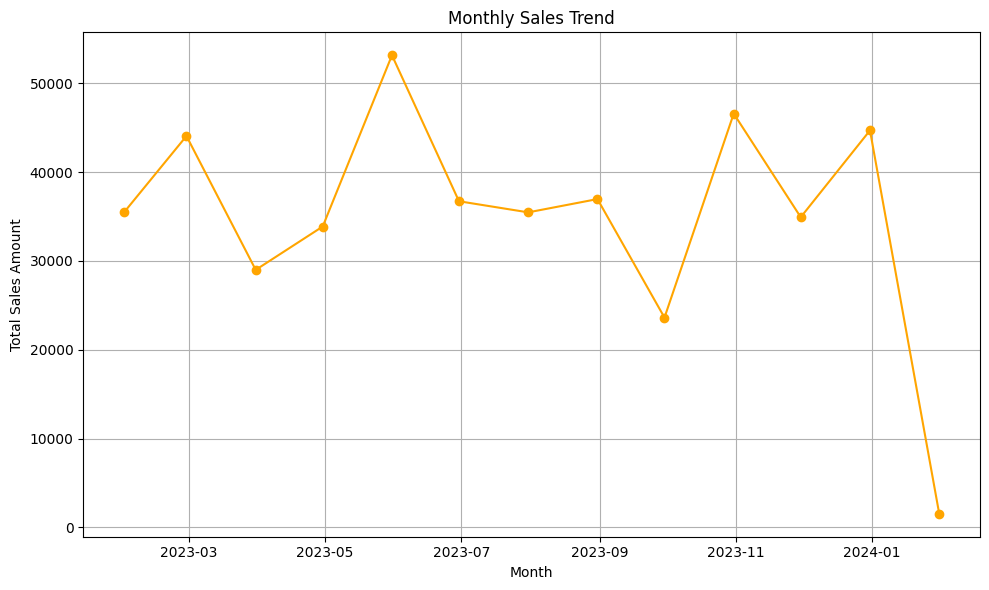

In [27]:
df_monthly_sales = df.set_index('Date').resample('M')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly_sales, marker='o', linestyle='-', color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

## 🏆 Top 5 Selling Months
This visualization highlights the months with the highest total sales.

**Steps performed:**
1. **Aggregate sales by month-end (`'ME'`)**  
   Using the `'Date'` column as the index, we group data by month-end and calculate the total sales amount for each period.
2. **Sort and select the top 5 months**  
   We sort sales in descending order and take the top 5 months with the highest sales.
3. **Plot with custom colors**  
   A bar chart is created with distinct colors for each month, making it easy to compare peak sales months.


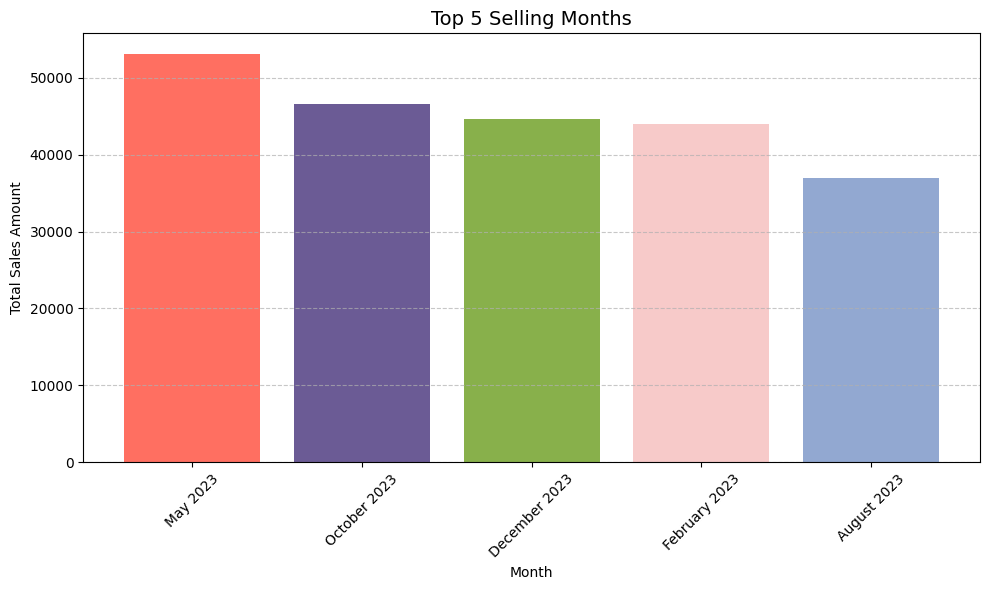

In [28]:
top_months = df.set_index('Date').resample('ME')['Total Amount'].sum().sort_values(ascending=False).head(5)

colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']  # Add or customize colors here

plt.figure(figsize=(10, 6))
plt.bar(top_months.index.strftime('%B %Y'), top_months.values, color=colors)
plt.title('Top 5 Selling Months', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🚻 Total Sales by Gender
This analysis compares total sales generated by different customer genders.

**Steps performed:**
1. **Group sales by gender**  
   We group the dataset by the `Gender` column and sum the `Total Amount` for each gender category.
2. **Apply custom colors**  
   Two distinct colors are assigned to make the comparison visually clear.
3. **Plot a bar chart**  
   A bar chart is created to quickly show which gender segment contributes more to total sales.


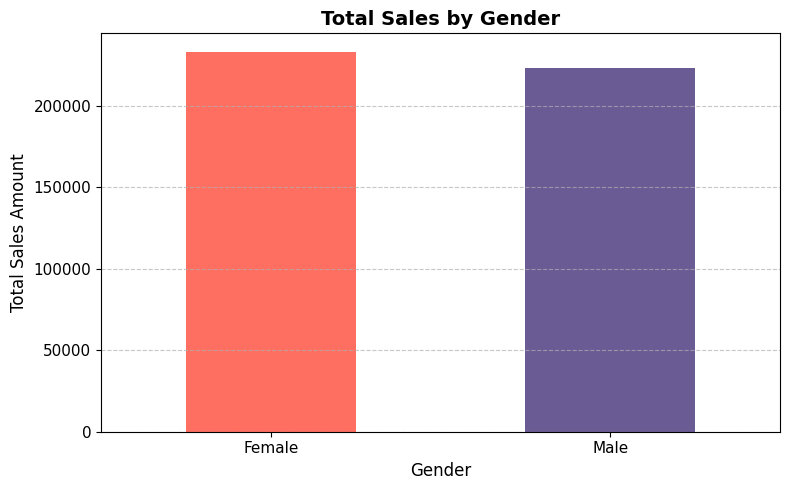

In [29]:
gender_sales = df.groupby("Gender")["Total Amount"].sum()

colors = ['#FF6F61', '#6B5B95']  

plt.figure(figsize=(8, 5))
gender_sales.plot(kind='bar', color=colors)

plt.title('Total Sales by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🎂 Customer Age Distribution
This histogram shows how customers are distributed across different age ranges.

**Steps performed:**
1. **Plot a histogram of the `Age` column**  
   We divide the ages into 5 bins and count the number of customers in each range.
2. **Customize the appearance**  
   - Set edge color for clear bin separation.  
   - Apply a soft color (`#F7CAC9`) for better visual appeal.  
   - Add gridlines for easier reading.  
3. **Interpretation**  
   This chart helps identify the most common age groups among customers, which can be useful for targeted marketing strategies.


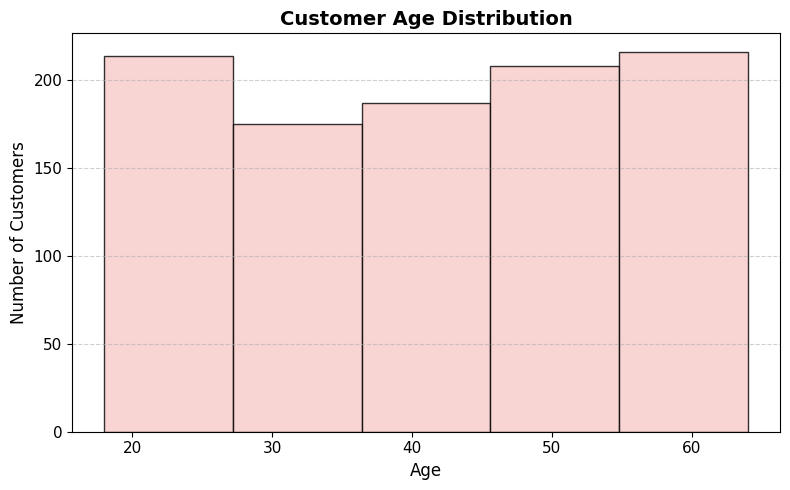

In [30]:
plt.figure(figsize=(8, 5))
df["Age"].plot(
    kind='hist',
    bins=5,
    edgecolor='black',
    color='#F7CAC9',  
    alpha=0.8
)

plt.title('Customer Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## 🛒 Sales by Product Category
This bar chart shows the total sales amount generated by each product category.

**Steps performed:**
1. **Group sales by `Product Category`**  
   The dataset is grouped by product category, and the `Total Amount` is summed for each category.
2. **Apply a custom color palette**  
   Distinct colors are assigned to each bar for better visual separation.
3. **Create the bar plot**  
   A vertical bar chart is plotted to compare sales performance across product categories.
4. **Insight**  
   This visualization helps identify which categories drive the most revenue, guiding inventory and marketing focus.


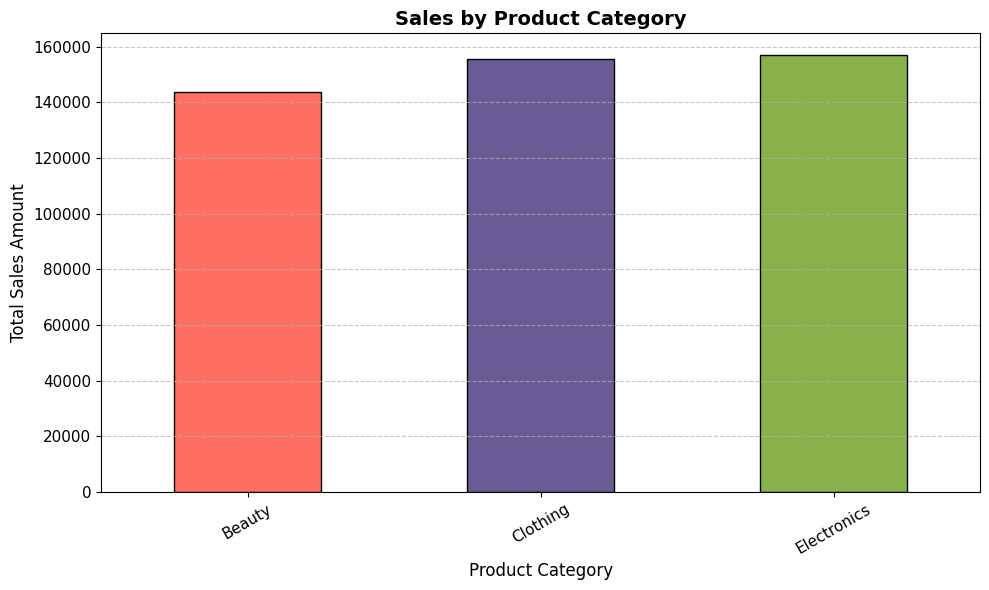

In [31]:
product_sales = df.groupby("Product Category")["Total Amount"].sum()

colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7']

plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color=colors[:len(product_sales)], edgecolor='black')

plt.title('Sales by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=30, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 📦 Top Purchased Product Categories by Quantity
This chart ranks product categories based on the total quantity sold.

**Steps performed:**
1. **Group by `Product Category` and sum `Quantity`**  
   We calculate the total quantity sold for each product category.
2. **Sort in descending order**  
   The categories are sorted from highest to lowest quantity sold.
3. **Apply a custom color palette**  
   A range of distinct colors is used to make each bar stand out.
4. **Create the bar chart**  
   The plot visually highlights which product categories are purchased the most in terms of volume.


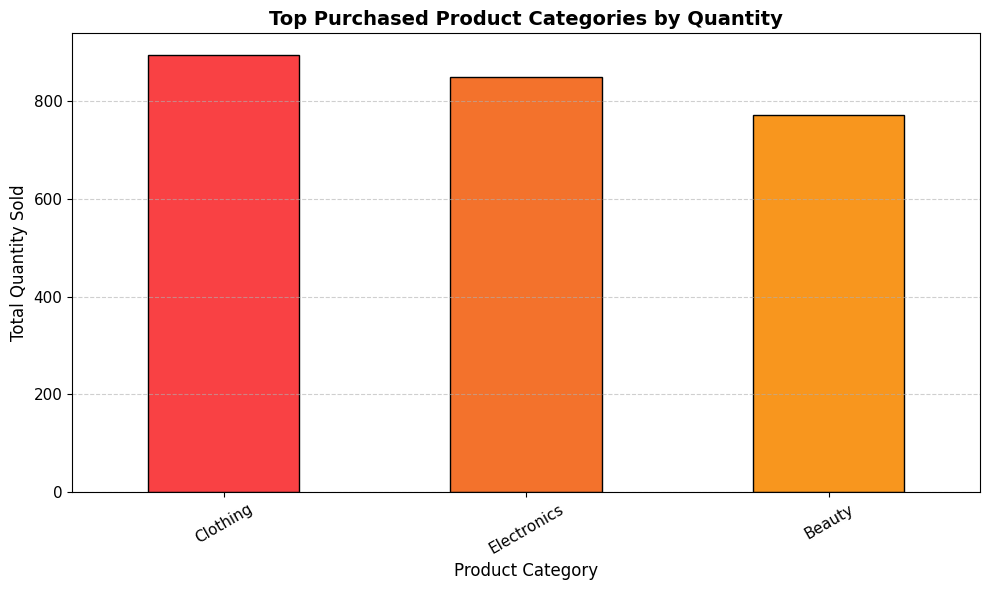

In [32]:
top_products = df.groupby("Product Category")["Quantity"].sum().sort_values(ascending=False)

colors = ['#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590']

plt.figure(figsize=(10, 6))
top_products.plot(
    kind='bar',
    color=colors[:len(top_products)],
    edgecolor='black'
)

plt.title('Top Purchased Product Categories by Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=30, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 🏅 Top 10 Frequent Customers
This bar chart highlights the customers with the highest number of purchases.

**Steps performed:**
1. **Count purchases per customer**  
   We use `.value_counts()` on the `Customer ID` column to determine how many purchases each customer made.
2. **Select the top 10 customers**  
   The most frequent buyers are identified by taking the top 10 entries.
3. **Apply a colorful palette**  
   Each bar is given a distinct color to make the chart visually engaging.
4. **Create the bar plot**  
   This visualization helps recognize loyal customers who make frequent purchases.


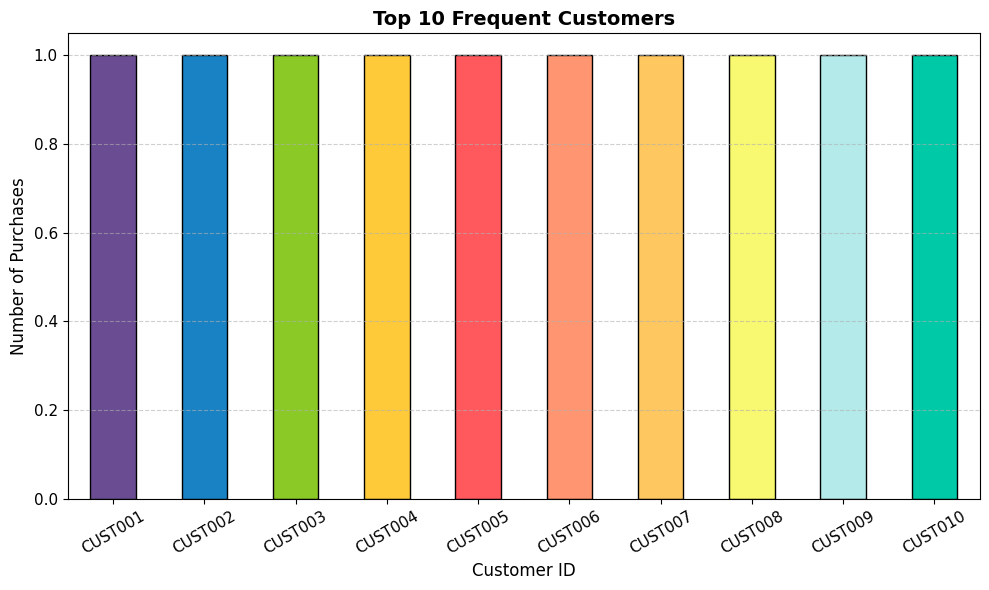

In [33]:
customer_frequency = df["Customer ID"].value_counts()
top_customers = customer_frequency.head(10)

colors = ['#6A4C93', '#1982C4', '#8AC926', '#FFCA3A', '#FF595E',
          '#FF9671', '#FFC75F', '#F9F871', '#B5EAEA', '#00C9A7']

plt.figure(figsize=(10, 6))
top_customers.plot(
    kind='bar',
    color=colors,
    edgecolor='black'
)

plt.title('Top 10 Frequent Customers', fontsize=14, fontweight='bold')
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=30, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 🔥 Sales Heatmap — Day of Week vs. Hour
This heatmap shows how sales vary depending on the **day of the week** and the **hour of the day**.

**Steps performed:**
1. **Extract day name and hour**  
   - From the `Date` column, we extract the **day of the week** (e.g., Monday, Tuesday).  
   - We also extract the **hour** (if time data is present) to analyze time-of-day patterns.
2. **Create a pivot table**  
   We aggregate the `Total Amount` by `Day` (rows) and `Hour` (columns).
3. **Plot a heatmap**  
   Using `seaborn.heatmap()`, we visualize the pivot table with a `YlOrRd` (Yellow-Orange-Red) color palette, where darker shades represent higher sales activity.
4. **Insight**  
   This helps identify the busiest shopping hours on specific days, useful for staffing and promotional planning.


<Axes: xlabel='Hour', ylabel='Day'>

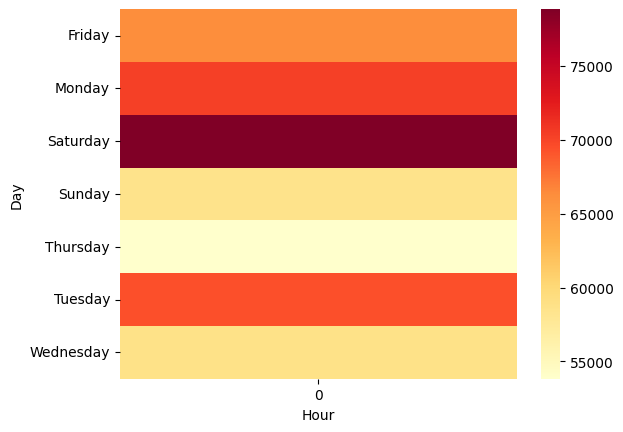

In [34]:
import seaborn as sns
df['Day'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour  

pivot = df.pivot_table(values='Total Amount', index='Day', columns='Hour', aggfunc='sum')
sns.heatmap(pivot, cmap='YlOrRd')

## 📊 Correlation Heatmap (Numeric Features)
This heatmap visualizes the correlation between key numeric variables in the dataset.

**Steps performed:**
1. **Select numeric columns**  
   We focus on `Age`, `Quantity`, `Price per Unit`, and `Total Amount` for correlation analysis.
2. **Calculate the correlation matrix**  
   Using `.corr()`, we compute Pearson correlation coefficients, which range from **-1** (strong negative) to **+1** (strong positive).
3. **Plot a heatmap**  
   The `seaborn.heatmap()` function is used with `annot=True` to display correlation values inside each cell, and the `"coolwarm"` color palette to highlight strong positive (red) and strong negative (blue) relationships.
4. **Interpretation**  
   This helps identify relationships between features — for example, whether higher prices are linked to higher sales amounts or if age influences purchase quantity.


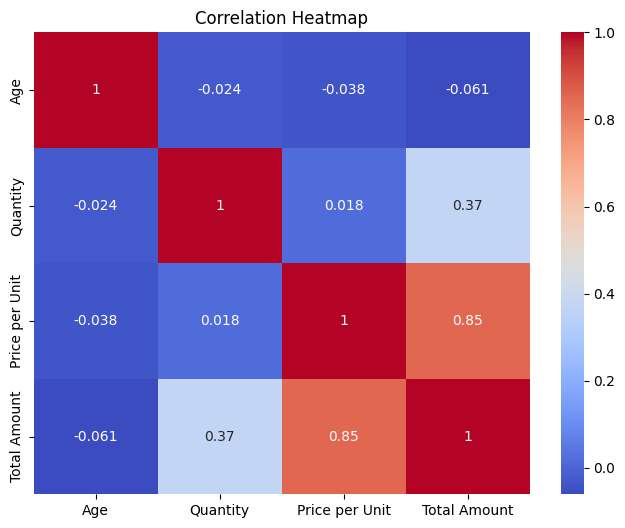

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[["Age", "Quantity", "Price per Unit", "Total Amount"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 🗓 Top 10 Selling Days
This bar chart highlights the top 10 days with the highest total sales.

**Steps performed:**
1. **Aggregate sales by date**  
   We group the dataset by `Date` and calculate the total `Total Amount` for each day.
2. **Select the top 10 dates**  
   Using `.nlargest(10)`, we identify the top 10 days with the highest sales amounts.
3. **Apply custom colors**  
   Each bar is given a unique color for better visual distinction.
4. **Create the bar chart**  
   The plot provides insights into peak sales days, which can help in understanding special events, promotions, or seasonal trends driving high sales.


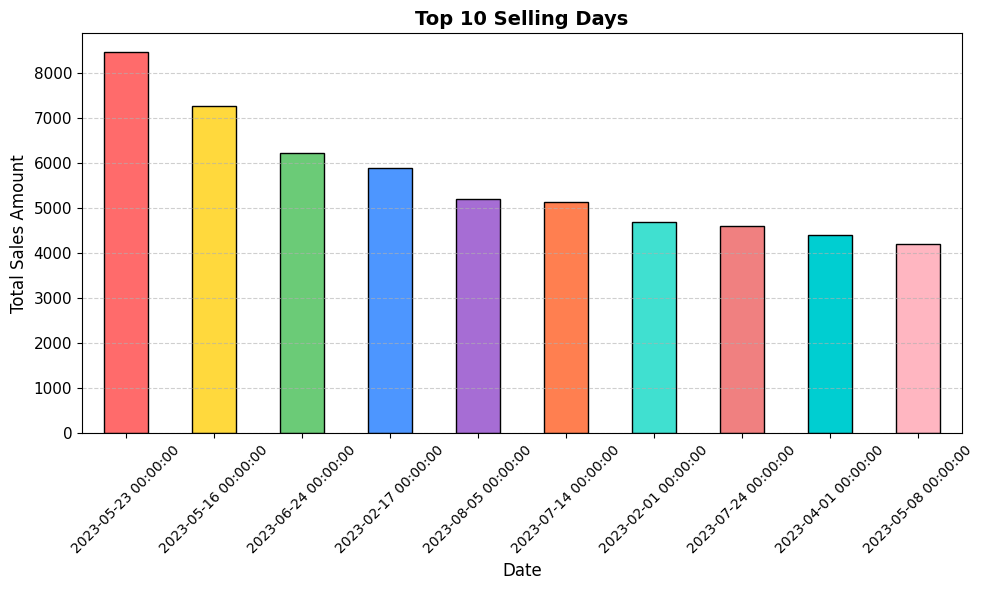

In [36]:
top_days = df.groupby('Date')["Total Amount"].sum().nlargest(10)

colors = ['#FF6B6B', '#FFD93D', '#6BCB77', '#4D96FF', '#A66DD4',
          '#FF7F50', '#40E0D0', '#F08080', '#00CED1', '#FFB6C1']

plt.figure(figsize=(10, 6))
top_days.plot(
    kind='bar',
    color=colors,
    edgecolor='black'
)

plt.title('Top 10 Selling Days', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 💼 Product Preferences by Gender
This stacked bar chart compares product category sales between genders.

**Steps performed:**
1. **Group sales by `Gender` and `Product Category`**  
   The dataset is grouped on both gender and product category, summing the `Total Amount` for each combination.
2. **Reshape the data**  
   We use `.unstack()` to pivot the product categories into separate columns for plotting.
3. **Create a stacked bar chart**  
   Using `plot(kind='bar', stacked=True)`, we visualize how each gender contributes to sales in different product categories.
4. **Insight**  
   This visualization makes it easy to see product preferences and compare category contributions across genders.


<Axes: title={'center': 'Product Preferences by Gender'}, xlabel='Gender'>

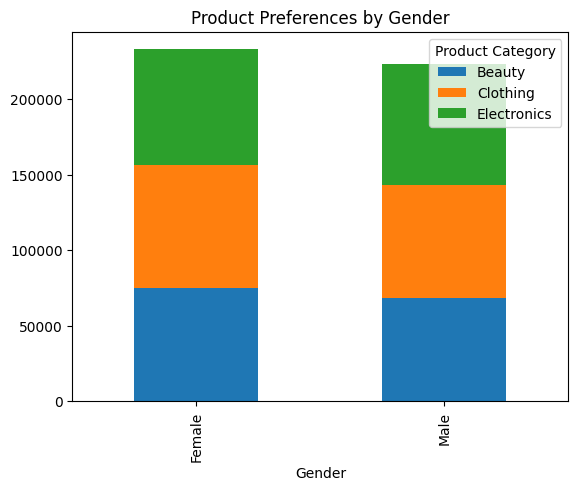

In [37]:

df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack().plot(kind='bar', stacked=True, title='Product Preferences by Gender')


## 📈 7-Day Moving Average of Daily Sales
This line chart smooths out daily fluctuations to reveal broader sales trends.

**Steps performed:**
1. **Ensure date format**  
   Convert the `Date` column to `datetime` format for proper time series operations.
2. **Calculate daily sales**  
   Resample the data by day (`'D'`) and sum the `Total Amount` for each date.
3. **Apply a 7-day moving average**  
   Smooth the series using `.rolling(window=7).mean()` to highlight trends without daily noise.
4. **Plot the trend line**  
   A clean line plot is created to visualize changes in sales over time, making patterns and seasonal effects easier to spot.


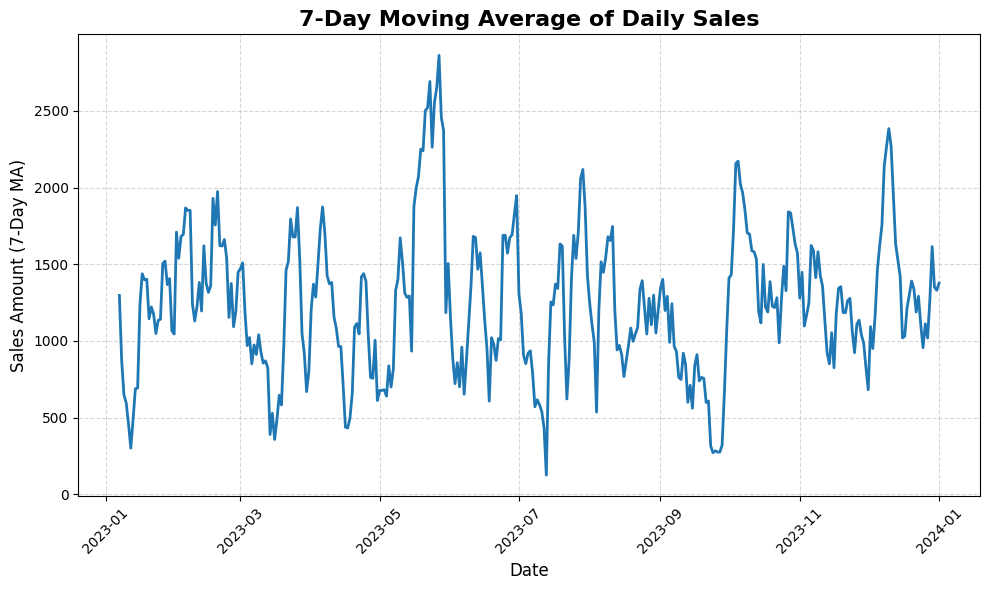

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

daily_sales_ma = df.set_index('Date').resample('D')['Total Amount'].sum().rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_sales_ma, color='#1f77b4', linewidth=2)

plt.title('7-Day Moving Average of Daily Sales', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Amount (7-Day MA)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 🧓 Age vs Average Spend
This line chart shows how the average spending amount varies across different customer ages.

**Steps performed:**
1. **Group by `Age`**  
   The dataset is grouped by the `Age` column, and the mean `Total Amount` is calculated for each age group.
2. **Create a line plot**  
   A line chart with markers is plotted to visualize the spending trend across ages.
3. **Insight**  
   This helps identify which age groups tend to spend more, which can guide targeted marketing campaigns and promotions.


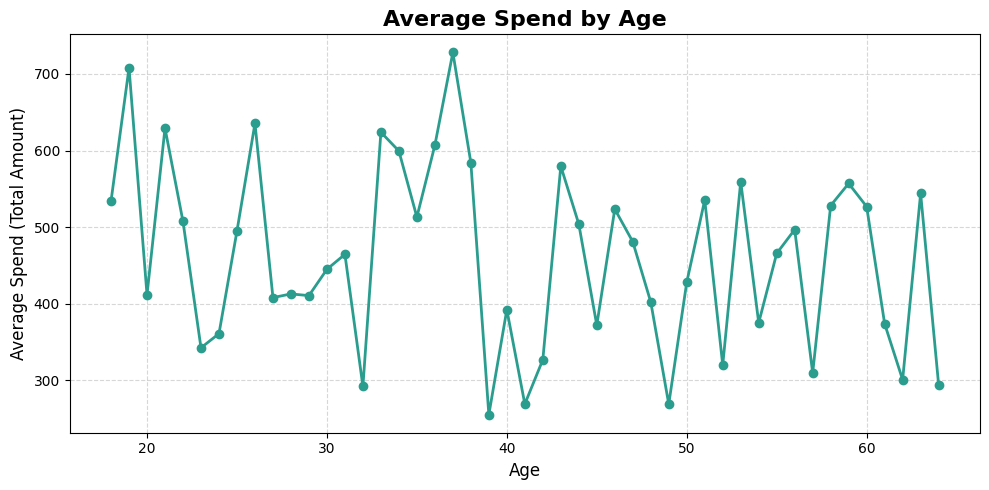

In [39]:
plt.figure(figsize=(10, 5))
df.groupby('Age')['Total Amount'].mean().plot(
    kind='line',
    color='#2a9d8f',
    marker='o',
    linewidth=2
)

plt.title('Average Spend by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Spend (Total Amount)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 🔹 Quantity Purchased by Product Category and Gender (Heatmap)
This heatmap visualizes the quantity of products purchased, broken down by product category and gender.

**Steps performed:**
1. **Create a pivot table**  
   - Index: `Product Category`  
   - Columns: `Gender`  
   - Values: Sum of `Quantity`  
   This structure allows us to compare quantities across genders for each product category.
2. **Plot a heatmap**  
   Using `seaborn.heatmap()` with annotations, we display exact values inside the cells.  
   The `"Blues"` color palette helps indicate intensity, with darker shades representing higher quantities.
3. **Insight**  
   This chart makes it easy to spot which product categories are most popular with each gender segment.


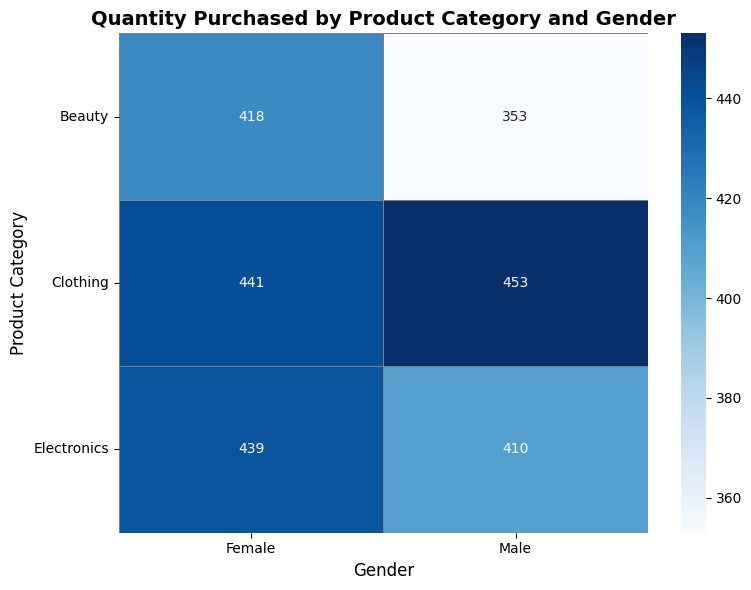

In [40]:
product_quantity = df.pivot_table(index='Product Category', columns='Gender', values='Quantity', aggfunc='sum')

plt.figure(figsize=(8, 6))
sns.heatmap(product_quantity, annot=True, cmap="Blues", fmt=".0f", linewidths=0.5, linecolor='gray')

plt.title("Quantity Purchased by Product Category and Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()